In [2]:
import numpy as np
np.random.seed(0)
import torch
torch.manual_seed(0)
import random
random.seed(0)
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch.nn import Module
import cv2
import os
import torchvision
import matplotlib.pyplot as plt


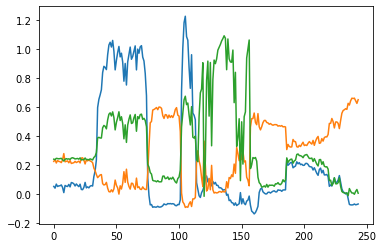

In [3]:
input_filename = "./vdata.csv"
raw_data_txt = np.loadtxt(input_filename, delimiter=',')
raw_data_x = raw_data_txt[:,0]
raw_data_y = raw_data_txt[:,1]
raw_data_z = raw_data_txt[:,2]

raw_data_idx = np.arange(raw_data_x.size)
plt.plot(raw_data_idx, raw_data_x)
plt.plot(raw_data_idx, raw_data_y)
plt.plot(raw_data_idx, raw_data_z)

In [5]:
def get_raw_data(dataIn, idx):
    if (idx < 0):
        return dataIn[0]
    elif (idx >= dataIn.size):
        return dataIn[dataIn.size-1]
    else:
        return dataIn[idx]
    #endif
#end def

def low_pass(dataIn, k_size, sigma):
    dataCount = dataIn.size
    res = np.zeros(dataCount)
    for i in range(dataCount):
        tmp = 0.0
        weight_sum = 0.0
        for j in range(k_size):
            x = j - (k_size-1)/2
            idx = i + int(x)
            gauss = np.exp(-x*x/(2.0*sigma*sigma))/np.sqrt(2.0*3.1416)*sigma
            weight_sum += gauss
            tmp += gauss * get_raw_data(dataIn, idx)
        #next
        tmp /= weight_sum
        res[i] = tmp
    #next
    return res
#end def


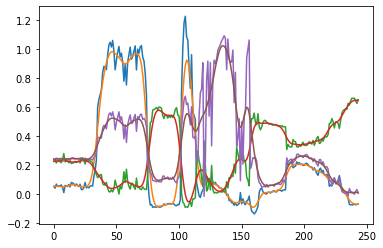

In [11]:
lp_x = low_pass(raw_data_x, 15, 3.0)
lp_y = low_pass(raw_data_y, 15, 3.0)
lp_z = low_pass(raw_data_z, 15, 3.0)

plt.figure()
plt.plot(raw_data_idx, raw_data_x)
plt.plot(raw_data_idx, lp_x)
plt.plot(raw_data_idx, raw_data_y)
plt.plot(raw_data_idx, lp_y)
plt.plot(raw_data_idx, raw_data_z)
plt.plot(raw_data_idx, lp_z)

#lp_rx = low_pass(raw_data_rx, 15, 8.0)
#lp_ry = low_pass(raw_data_ry, 15, 8.0)
#lp_rz = low_pass(raw_data_rz, 15, 8.0)
#
#plt.figure()
#plt.plot(raw_data_idx, raw_data_rx)
#plt.plot(raw_data_idx, lp_rx)

In [12]:
data_out = []
for i in range(raw_data_x.size):
    tmp = [lp_x[i], lp_y[i], lp_z[i]]
    data_out.append(tmp)
#next
data_out = np.array(data_out)
np.savetxt("./vdata_lp.txt", data_out, delimiter=',')


<BarContainer object of 6 artists>

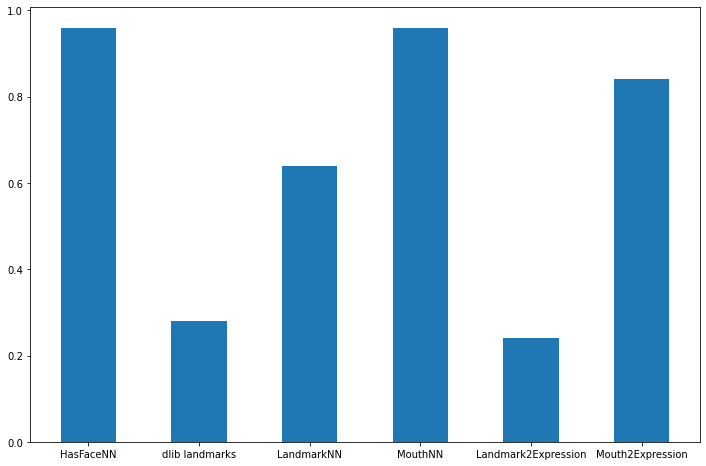

In [11]:
x = ['HasFaceNN', 'dlib landmarks', 'LandmarkNN', 'MouthNN', 'Landmark2Expression', 'Mouth2Expression']
ind = [0,1,2,3,4,5] 
y = [0.96, 0.28, 0.64, 0.96, 0.24, 0.84]

fig = plt.figure(figsize = (12,8))
plt.bar(ind,y, tick_label = x, width = 0.5)